<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Classifications/SpaceShip_Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 96.3MB/s]


In [5]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


## Data Exploration and Data Cleaning


In [94]:
train_dataset = pd.read_csv('/content/train.csv')
test_dataset = pd.read_csv('/content/test.csv')

In [95]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [96]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [97]:
test_dataset.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [98]:
train_dataset.shape

(8693, 14)

In [99]:
train_dataset.shape

(8693, 14)

In [100]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [101]:
train_dataset['Transported'] = encoder.fit_transform(train_dataset['Transported'])

In [102]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [103]:
mode = train_dataset['HomePlanet'].mode()
train_dataset['HomePlanet'] = train_dataset['HomePlanet'].replace(np.nan,mode[0])
test_dataset['HomePlanet'] = test_dataset['HomePlanet'].replace(np.nan,test_dataset['HomePlanet'].mode()[0])

In [104]:
train_dataset['CryoSleep'] = train_dataset['CryoSleep'].replace(np.nan,train_dataset['CryoSleep'].mode()[0])
test_dataset['CryoSleep'] = test_dataset['CryoSleep'].replace(np.nan,test_dataset['CryoSleep'].mode()[0])

In [105]:
train_dataset['CryoSleep'] = encoder.fit_transform(train_dataset['CryoSleep'])
test_dataset['CryoSleep'] = encoder.fit_transform(test_dataset['CryoSleep'])

In [106]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [107]:
train_dataset['Destination'] = train_dataset['Destination'].replace(np.nan,train_dataset['Destination'].mode()[0])
test_dataset['Destination'] = test_dataset['Destination'].replace(np.nan,test_dataset['Destination'].mode()[0])

In [108]:
train_dataset['Age'] = train_dataset['Age'].fillna(train_dataset['Age'].median())
test_dataset['Age'] = test_dataset['Age'].fillna(test_dataset['Age'].median())

In [109]:
train_dataset['VIP'] = train_dataset['VIP'].replace(np.nan,train_dataset['VIP'].mode()[0])
test_dataset['VIP'] = test_dataset['VIP'].replace(np.nan,test_dataset['VIP'].mode()[0])

In [110]:
train_dataset['VIP'] = encoder.fit_transform(train_dataset['VIP'])
test_dataset['VIP'] = encoder.fit_transform(test_dataset['VIP'])

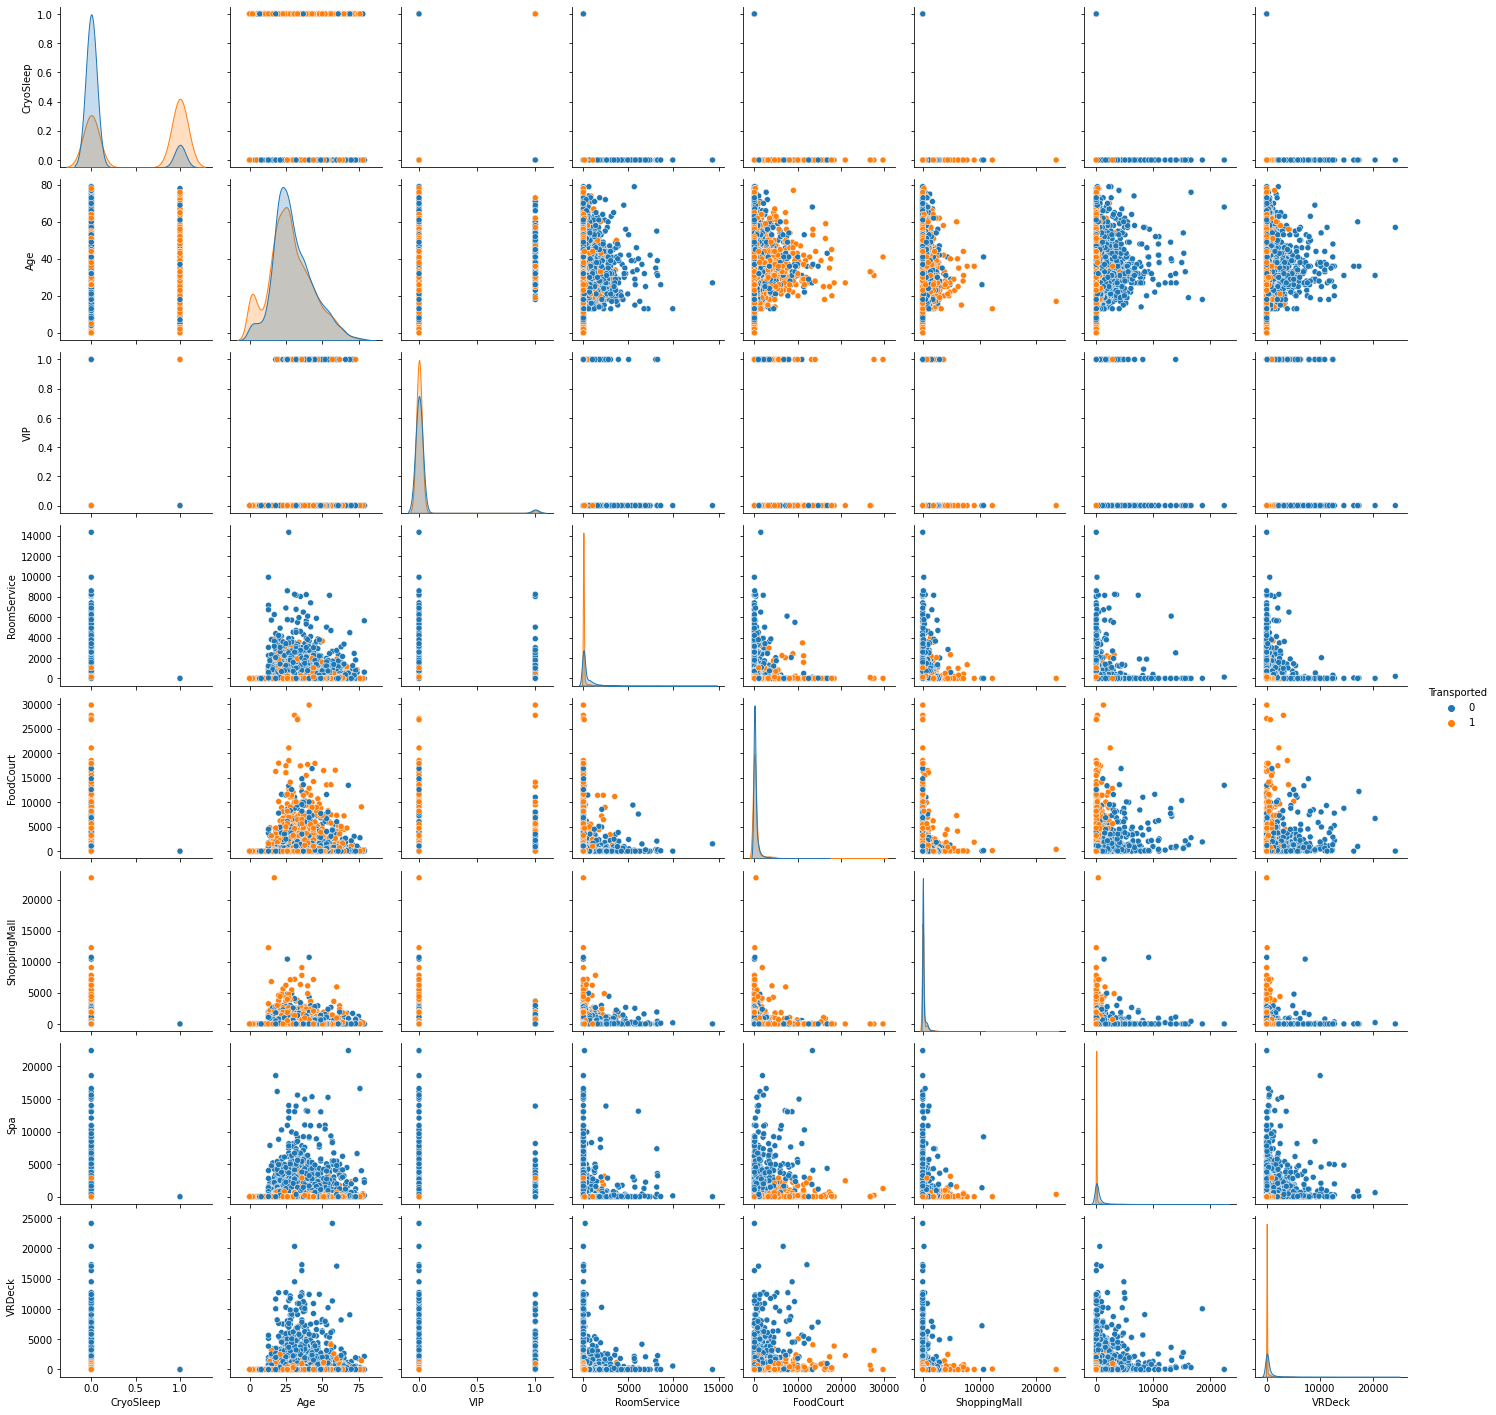

In [111]:
sns.pairplot(train_dataset,hue = 'Transported')

In [112]:
train_dataset['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., 25., 38., 36.,
       22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64., 67.,
       61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5., 79.,
       68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66., 69.,
       72., 77.])

In [113]:
train_dataset['Age_Bin'] = pd.cut(train_dataset['Age'],bins=[-np.inf,12,20,40,120],labels=['Children','Teenage','Adult','Senior Citizen'])
test_dataset['Age_Bin'] = pd.cut(test_dataset['Age'],bins=[-np.inf,12,20,40,120],labels=['Children','Teenage','Adult','Senior Citizen'])

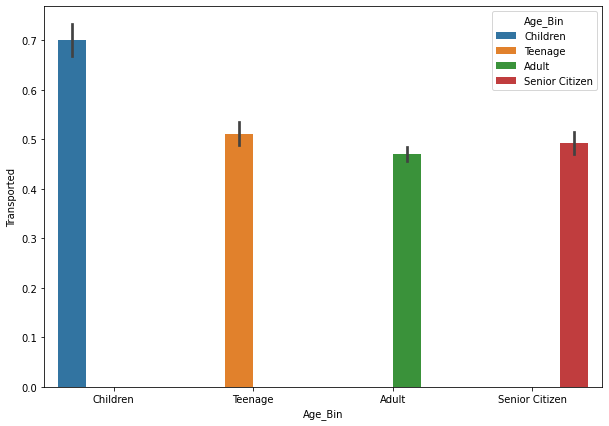

In [114]:
plt.figure(figsize = (10,7))
sns.barplot(data=train_dataset,x="Age_Bin",y="Transported",hue = "Age_Bin")

In [115]:
train_dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Bin
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,Adult
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,Adult
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,Senior Citizen
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,Adult
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,Teenage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,Senior Citizen
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,Teenage
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,Adult
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,Adult


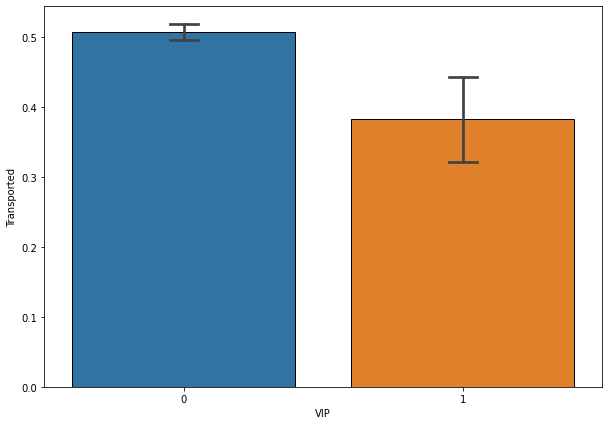

In [116]:
plt.figure(figsize=(10,7))
sns.barplot(data=train_dataset,x = "VIP",y="Transported",capsize=0.1, edgecolor='k')

In [117]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Age_Bin           0
dtype: int64

In [118]:
## Mean Median Mode Comparisons
def mean_median_plot(df,column):
  room_service_mean = df[column].mean()
  room_service_median = df[column].median()
  plt.figure(figsize = (10,7))
  sns.distplot(df[column]);
  plt.axvline(room_service_mean,color='b', linestyle='--')
  plt.axvline(room_service_median,color='red',)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


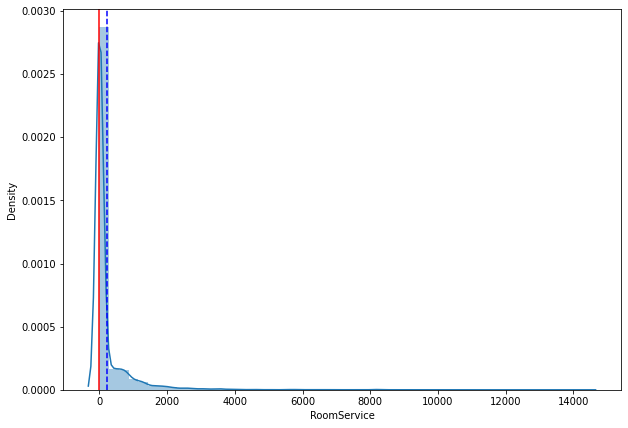

In [119]:
## RoomService
mean_median_plot(train_dataset,'RoomService')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


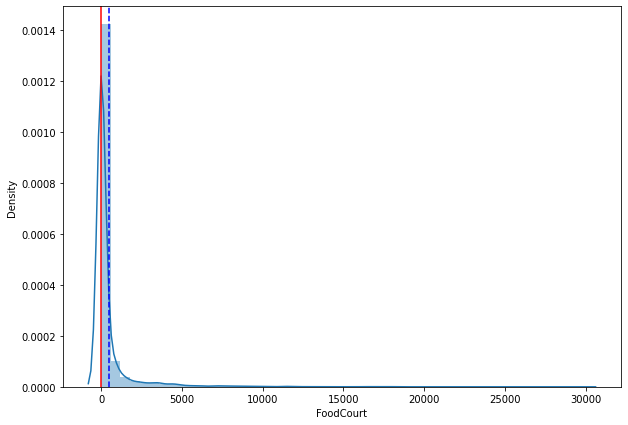

In [120]:
## FoodCourt
mean_median_plot(train_dataset,'FoodCourt')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


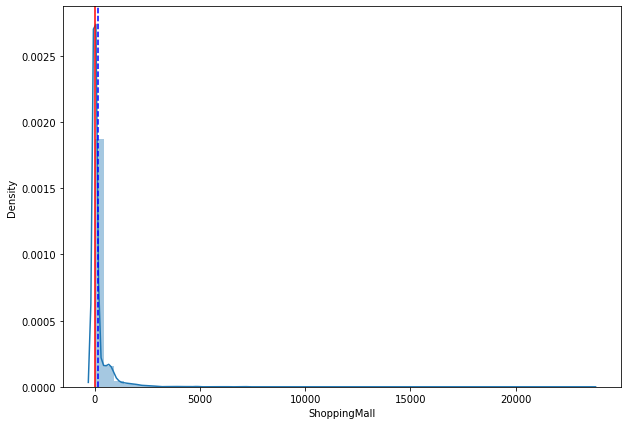

In [121]:
## Shopping Mall
mean_median_plot(train_dataset,'ShoppingMall')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


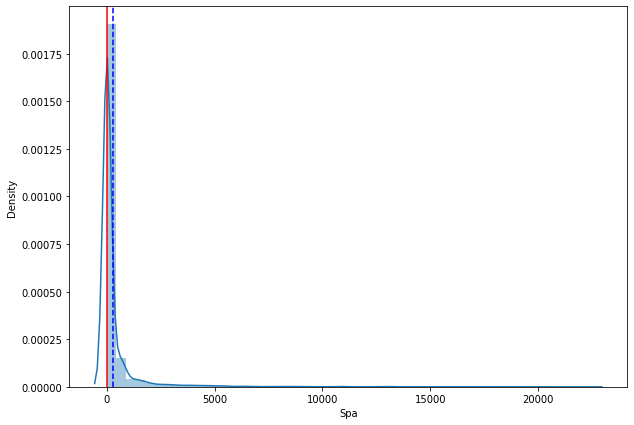

In [122]:
## SPA
mean_median_plot(train_dataset,'Spa')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


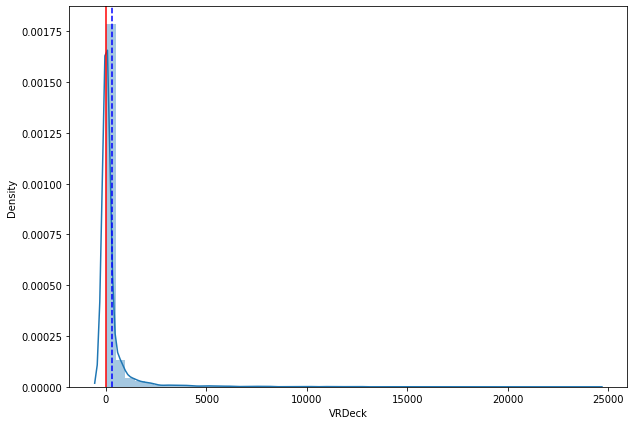

In [123]:
## VRDeck
mean_median_plot(train_dataset,'VRDeck')

In [124]:
train_dataset['RoomService'] = train_dataset['RoomService'].replace(np.nan,train_dataset['RoomService'].mean())
test_dataset['RoomService'] = test_dataset['RoomService'].replace(np.nan,test_dataset['RoomService'].mean())

In [125]:
train_dataset['ShoppingMall'] = train_dataset['ShoppingMall'].replace(np.nan,train_dataset['ShoppingMall'].mean())
test_dataset['ShoppingMall'] = test_dataset['ShoppingMall'].replace(np.nan,test_dataset['ShoppingMall'].mean())

In [126]:
train_dataset['Spa'] = train_dataset['Spa'].replace(np.nan,train_dataset['Spa'].mean())
test_dataset['Spa'] = test_dataset['Spa'].replace(np.nan,test_dataset['Spa'].mean())

In [127]:
train_dataset['FoodCourt'] = train_dataset['FoodCourt'].replace(np.nan,train_dataset['FoodCourt'].mean())
test_dataset['FoodCourt'] = test_dataset['FoodCourt'].replace(np.nan,test_dataset['FoodCourt'].mean())

In [128]:
train_dataset['VRDeck'] = train_dataset['VRDeck'].replace(np.nan,train_dataset['VRDeck'].mean())
test_dataset['VRDeck'] = test_dataset['VRDeck'].replace(np.nan,test_dataset['VRDeck'].mean())

In [129]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Age_Bin           0
dtype: int64

In [130]:
train_cabins = train_dataset['Cabin'].str.split('/',expand = True)
train_dataset['Cabin'] = train_cabins[0]

In [131]:
test_cabins = test_dataset['Cabin'].str.split('/',expand = True)
test_dataset['Cabin'] = test_cabins[0]

In [134]:
train_dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Age_Bin           0
dtype: int64

In [137]:
train_dataset['Cabin'] = train_dataset['Cabin'].replace(np.nan,train_dataset['Cabin'].mode()[0])
test_dataset['Cabin'] = test_dataset['Cabin'].replace(np.nan,test_dataset['Cabin'].mode()[0])

## Data Scaling and Encoding

In [138]:
train_dataset = pd.get_dummies(train_dataset,columns = ['HomePlanet','Age_Bin','Destination','Cabin'])
test_dataset = pd.get_dummies(test_dataset,columns = ['HomePlanet','Age_Bin','Destination','Cabin'])

In [139]:
train_dataset

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,1,0,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,...,0,0,1,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,...,1,0,0,0,0,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,...,0,0,0,0,0,0,1,0,0,0


In [140]:
def min_maximum_scale(series):
    return (series - series.min()) / (series.max() - series.min())

In [141]:

train_dataset['RoomService'] = min_maximum_scale(train_dataset['RoomService'])
train_dataset['Spa'] = min_maximum_scale(train_dataset['Spa'])
train_dataset['FoodCourt'] = min_maximum_scale(train_dataset['FoodCourt'])
train_dataset['ShoppingMall'] = min_maximum_scale(train_dataset['ShoppingMall'])
train_dataset['VRDeck'] = min_maximum_scale(train_dataset['VRDeck'])

In [142]:
test_dataset['RoomService'] = min_maximum_scale(test_dataset['RoomService'])
test_dataset['Spa'] = min_maximum_scale(test_dataset['Spa'])
test_dataset['FoodCourt'] = min_maximum_scale(test_dataset['FoodCourt'])
test_dataset['ShoppingMall'] = min_maximum_scale(test_dataset['ShoppingMall'])
test_dataset['VRDeck'] = min_maximum_scale(test_dataset['VRDeck'])

In [143]:
x = train_dataset.drop(['PassengerId','Age','Name','Transported'],axis = 1)
y = train_dataset['Transported']

## Model Training

In [144]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [147]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [148]:
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:38<00:00,  1.33s/it]


In [149]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.79,0.79,0.79,0.71
XGBClassifier,0.79,0.79,0.79,0.79,1.48
CalibratedClassifierCV,0.79,0.79,0.79,0.79,3.52
LinearSVC,0.79,0.79,0.79,0.79,1.36
LogisticRegression,0.78,0.78,0.78,0.78,0.18
RandomForestClassifier,0.78,0.78,0.78,0.78,2.28
AdaBoostClassifier,0.78,0.78,0.78,0.78,0.40
SVC,0.78,0.78,0.78,0.78,5.37
NuSVC,0.78,0.78,0.78,0.78,7.13


### Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [151]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


KeyboardInterrupt: ignored

In [ ]:
random_classifier = RandomForestClassifier(max_depth=50)
random_classifier.fit(x_train,y_train)


In [ ]:
y_pred = random_classifier.predict(x_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.7832087406555491

### LGBM Booster

In [152]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [154]:
lgbm_classifier = LGBMClassifier(max_bin = 20,learning_rate=0.001,num_iterations = 500,num_leaves = 10)
lgbm_classifier.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.001, max_bin=20, num_iterations=500,
               num_leaves=10)

In [155]:
y_lgbm_predict = lgbm_classifier.predict(x_test)

In [156]:
accuracy_score(y_lgbm_predict,y_test)

0.7809085681426107

#### RandomSearch

In [ ]:
tf.random.set_seed(42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rs_params = {
        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)
}

In [ ]:
rs_cv = RandomizedSearchCV(estimator=LGBMClassifier(), param_distributions=rs_params, cv = 5, n_iter=100,verbose=1)

In [ ]:
rs_cv.fit(x,y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'bagging_fraction': (0.5, 0.8),
                                        'bagging_frequency': (5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'max_depth': (10, 13),
                                        'min_data_in_leaf': (90, 120),
                                        'num_leaves': (1200, 1550)},
                   verbose=1)

### ANN

In [ ]:
x.shape

(8693, 17)

In [159]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape = (25,)),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [160]:
model.fit(x,y,epochs = 150,batch_size = 32)

Epoch 1/150
272/272 [==============================] - 4s 8ms/step - loss: 0.5169 - accuracy: 0.7417
Epoch 2/150
272/272 [==============================] - 2s 7ms/step - loss: 0.4658 - accuracy: 0.7660
Epoch 3/150
272/272 [==============================] - 2s 8ms/step - loss: 0.4395 - accuracy: 0.7825
Epoch 4/150
272/272 [==============================] - 2s 8ms/step - loss: 0.4321 - accuracy: 0.7861
Epoch 5/150
272/272 [==============================] - 2s 8ms/step - loss: 0.4250 - accuracy: 0.7879
Epoch 6/150
272/272 [==============================] - 2s 8ms/step - loss: 0.4224 - accuracy: 0.7870
Epoch 7/150
272/272 [==============================] - 2s 7ms/step - loss: 0.4221 - accuracy: 0.7894
Epoch 8/150
272/272 [==============================] - 2s 8ms/step - loss: 0.4182 - accuracy: 0.7928
Epoch 9/150
272/272 [==============================] - 2s 8ms/step - loss: 0.4162 - accuracy: 0.7933
Epoch 10/150
272/272 [==============================] - 2s 8ms/step - loss: 0.4113 - accura

## Predictions

In [161]:
x_val = test_dataset.drop(['PassengerId','Age','Name'],axis = 1)

In [162]:
passengers = test_dataset['PassengerId']

### ANN

In [163]:
y_pred = model.predict(x_val)

134/134 [==============================] - 0s 2ms/step


In [164]:
y_pred_zero_one = []
for i in y_pred:
  if i >0.5:
    y_pred_zero_one.append(False)
  else:
    y_pred_zero_one.append(True)

In [165]:
datas = {"PassengerId":passengers,"Transported":y_pred_zero_one}
dataframe = pd.DataFrame(datas)

In [166]:
dataframe.to_csv("submissions.csv",index = False)

In [167]:
!kaggle competitions submit -c spaceship-titanic -f submissions.csv -m "ANN"

100% 56.8k/56.8k [00:00<00:00, 278kB/s]
Successfully submitted to Spaceship Titanic

## LBGM

In [168]:
y_pred = lgbm_classifier.predict(x_val)

In [169]:
y_pred_zero_one = []
for i in y_pred:
  if i ==0:
    y_pred_zero_one.append(False)
  else:
    y_pred_zero_one.append(True)

In [170]:
datas = {"PassengerId":passengers,"Transported":y_pred_zero_one}
dataframe = pd.DataFrame(datas)

In [171]:
dataframe.to_csv("submissions.csv",index = False)

In [172]:
!kaggle competitions submit -c spaceship-titanic -f submissions.csv -m "LBGM"

100% 56.2k/56.2k [00:00<00:00, 261kB/s]
Successfully submitted to Spaceship Titanic

###  RandomCV Pred

In [ ]:
y_pred_cv = rs_cv.predict(x_val)

In [ ]:
y_pred_zero_one = []
for i in y_pred:
  if i ==0:
    y_pred_zero_one.append(False)
  else:
    y_pred_zero_one.append(True)

In [ ]:
datas = {"PassengerId":passengers,"Transported":y_pred_zero_one}
dataframe = pd.DataFrame(datas)

In [ ]:
dataframe.to_csv("submissions.csv",index = False)

In [ ]:
!kaggle competitions submit -c spaceship-titanic -f submissions.csv -m "LBGM"

100% 56.1k/56.1k [00:02<00:00, 26.6kB/s]
Successfully submitted to Spaceship Titanic